In [1]:
import numpy as np
import random
import dadi
import pickle
sys.path.append(os.path.join(os.getcwd(), '..')) # this is the ml_dadi dir
import data_manip, bootstrap
from data_manip import generating_data_log_bootstraps

In [2]:
# Load trained ML models to run bootstrap on
list_rfr = pickle.load(open('data/list_rfr','rb'))
list_mlpr = pickle.load(open('data/list_mlpr','rb'))

In [5]:
# # Generate bootstrap datasets for 2d_splitmig model
# bootstrap_params = []

# while (len(bootstrap_params) < 200):   
#     nu1 = random.random() * 4 - 2
#     nu2 = random.random() * 4 - 2
#     T = random.random() * 1.9 + 0.1
#     m = random.random() * 9 + 1
#     # if (include condition):
#     params = (nu1, nu2, T, m)
#     bootstrap_params.append(params)

# # generate a list of theta values to run scaling and add variance
# theta_list = [10000, 1000, 100]

# # print some info of testing data
# print('n_samples testing: ', len(bootstrap_params))
# print('Range of testing params:', min(bootstrap_params), 'to', 
#         max(bootstrap_params))
# print('Theta list:', theta_list)

# # designate demographic model, sample size, and extrapolation grid 
# func = dadi.Demographics2D.split_mig
# ns = [20,20]
# pts_l = [40, 50, 60]
# logs = [True, True, False, False]

# list_bootstrap_dicts = generating_data_log_bootstraps(bootstrap_params, 
#                         theta_list, func, ns, pts_l, logs)
# pickle.dump(list_bootstrap_dicts, open('data/bootstrap_data', 'wb'), 2)

n_samples testing:  200
Range of testing params: (-1.9875214647156922, 1.0174688292813605, 1.1703063654040922, 9.543906779803443) to (1.9989570692480565, 1.3229420483659662, 1.1320118004081323, 8.199539902766718)
Theta list: [10000, 1000, 100]


In [3]:
# Load bootstrap samples: list of 3 dicts for Theta list: [10000, 1000, 100]
# Each dict contain 200 items with the format 
# true_p:[orig_fs,[200 bootstrapped fs from orig_fs]]
list_bootstrap_dicts = pickle.load(open('data/bootstrap_data', 'rb'))

In [8]:
# # Choose one trained model from the list to run bootstrap on
# rfr_1000 = list_rfr[2]
# list_pred_dicts_bstr = bootstrap.bootstrap_predictions(rfr_1000, list_bootstrap_dicts)
# pickle.dump(list_pred_dicts_bstr, 
#                 open('results/bootstrap/boostrap_pred_rfr_1000', 'wb'), 2)

In [21]:
# # Choose one trained model from the list to run bootstrap on
# rfr_100 = list_rfr[3]
# list_pred_dicts_bstr = bootstrap.bootstrap_predictions(rfr_100, list_bootstrap_dicts)
# pickle.dump(list_pred_dicts_bstr, 
#                 open('results/bootstrap/boostrap_pred_rfr_100', 'wb'), 2)

In [23]:
# # Choose one trained model from the list to run bootstrap on
# rfr_1 = list_rfr[0]
# list_pred_dicts_bstr = bootstrap.bootstrap_predictions(rfr_1, list_bootstrap_dicts)
# pickle.dump(list_pred_dicts_bstr, 
#                 open('results/bootstrap/boostrap_pred_rfr_1', 'wb'), 2)

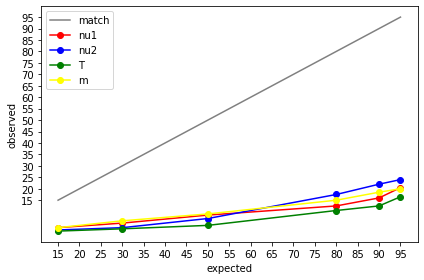

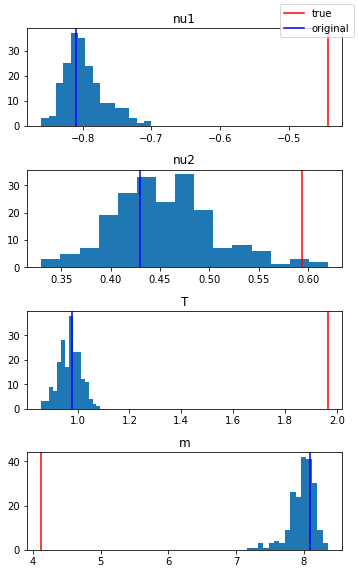

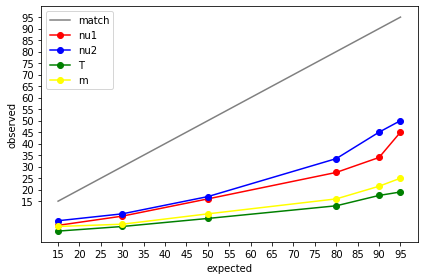

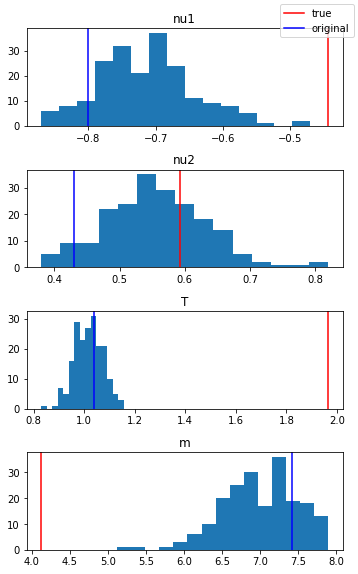

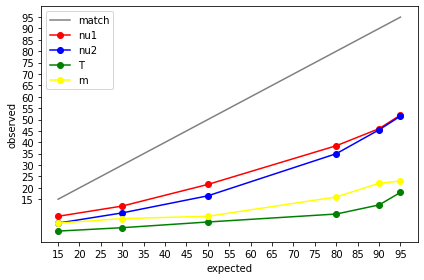

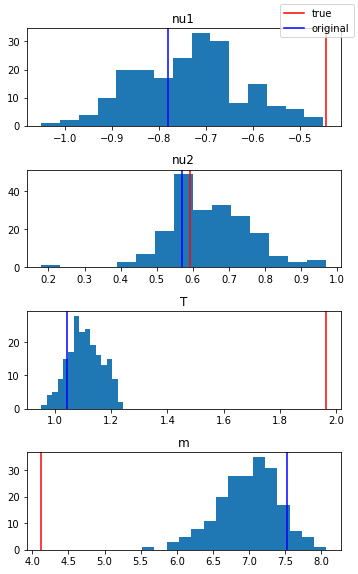

In [4]:
datafile = 'results/bootstrap/boostrap_pred_rfr_1000'
params = ['nu1', 'nu2', 'T', 'm']
expected = [95, 90, 80, 50, 30, 15]
#for datafile in ('bootstrap_nn', 'bootstrap_rf'):
for theta_i in range(3):
    bootstrap.plot_coverage(datafile, params, expected, theta_i)
    bootstrap.plot_distribution(datafile, params, theta_i, 87)

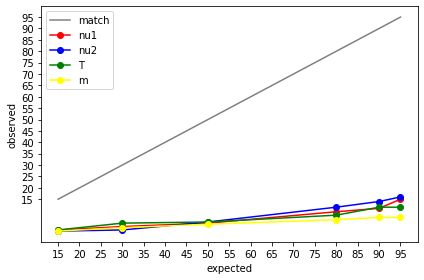

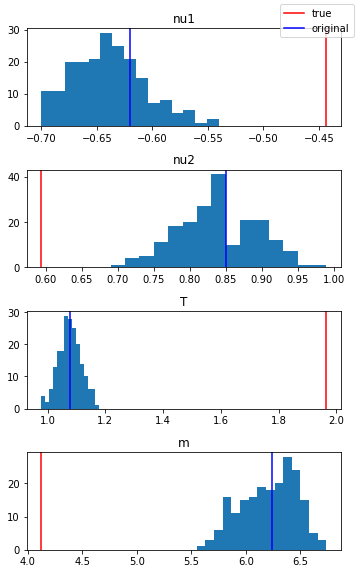

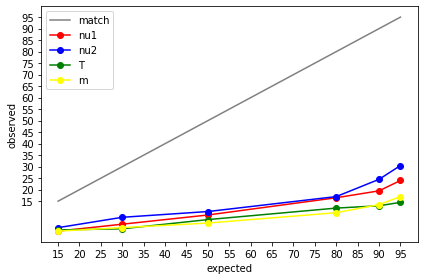

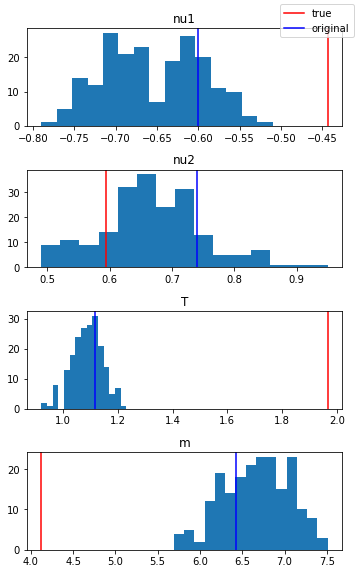

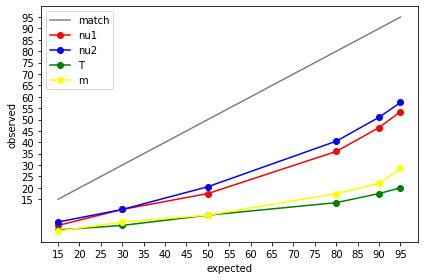

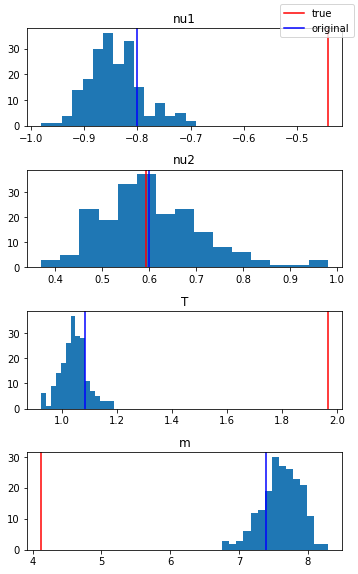

In [6]:
datafile = 'results/bootstrap/boostrap_pred_rfr_100'
params = ['nu1', 'nu2', 'T', 'm']
expected = [95, 90, 80, 50, 30, 15]
#for datafile in ('bootstrap_nn', 'bootstrap_rf'):
for theta_i in range(3):
    bootstrap.plot_coverage(datafile, params, expected, theta_i)
    bootstrap.plot_distribution(datafile, params, theta_i, 87)

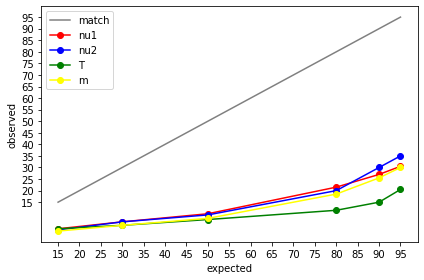

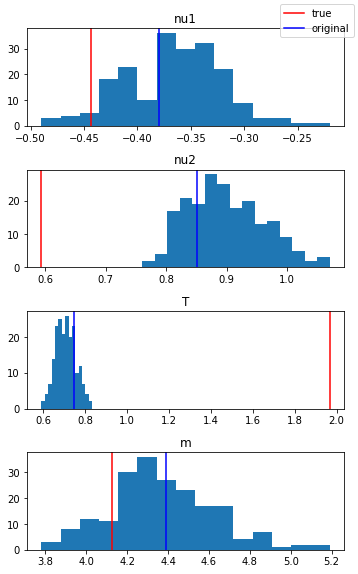

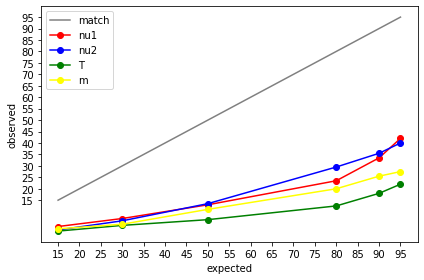

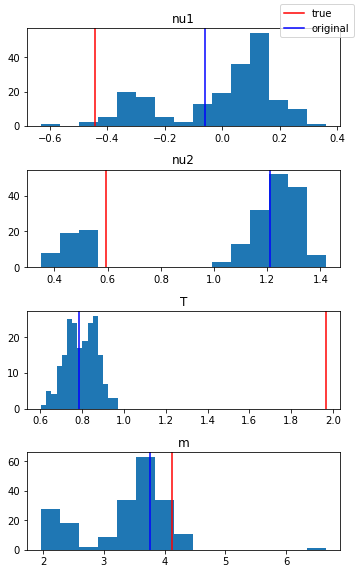

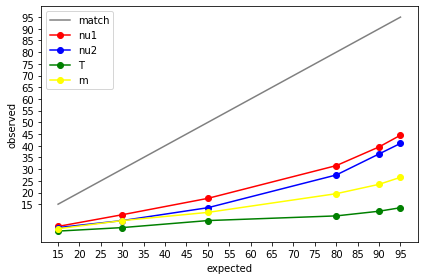

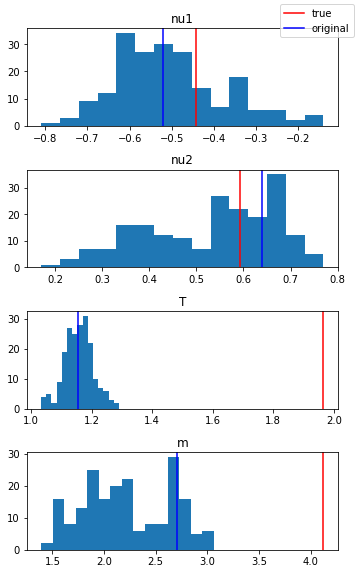

In [7]:
datafile = 'results/bootstrap/boostrap_pred_rfr_1'
params = ['nu1', 'nu2', 'T', 'm']
expected = [95, 90, 80, 50, 30, 15]
for theta_i in range(3):
    bootstrap.plot_coverage(datafile, params, expected, theta_i)
    bootstrap.plot_distribution(datafile, params, theta_i, 87)

(4, 200, 4)


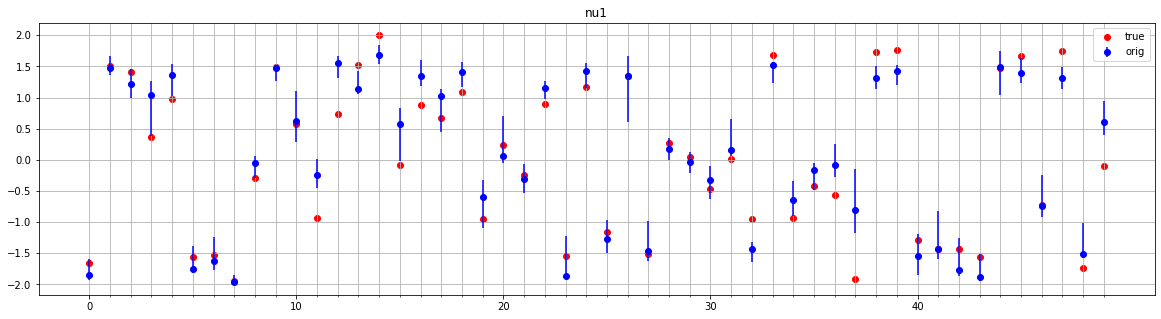

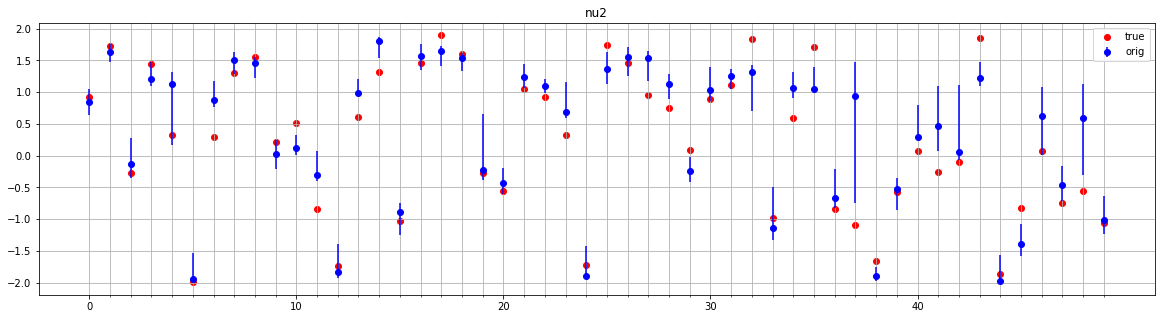

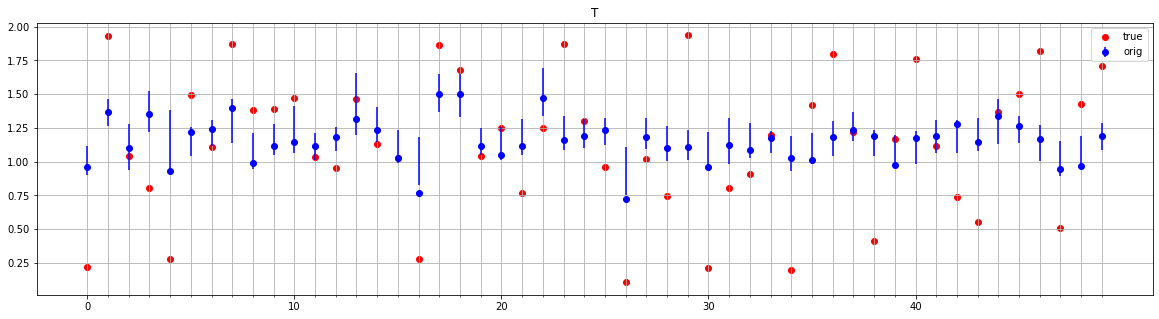

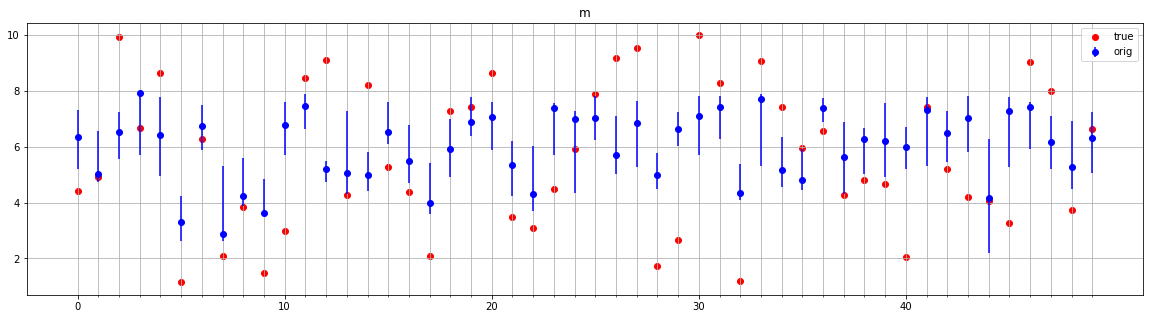

In [5]:
import matplotlib.pyplot as plt
datafile = 'results/bootstrap/boostrap_pred_rfr_1000'
size = 50
params = ['nu1', 'nu2', 'T', 'm']
theta_i = 2
int_arr_all = bootstrap.bootstrap_intervals(datafile, params, theta_i)
int_arr_all = np.array(int_arr_all)
print(int_arr_all.shape)
# plot all intervals
x = range(size)
for param,int_arr in zip(params, int_arr_all):
    int_arr = int_arr[:size] # take the first [size] results instead of using all 200
    int_arr = int_arr.transpose(1, 0)
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(1,1,1)
    minor_ticks = np.arange(0, size)
    major_ticks = np.arange(0, size, 10)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.grid(which='both')

    ax.scatter(x, int_arr[0], c="red", label="true") # true
    neg_int = int_arr[1] - int_arr[2]
    pos_int = int_arr[3] - int_arr[1]
    ax.errorbar(x, int_arr[1], yerr=[neg_int, pos_int], fmt='bo', label="orig")
    ax.set_title(param)
    ax.legend()
    
    # plt.savefig(f'results/{datafile}_{param}_{size}_intervals_theta{theta_list[theta_i]}.png')
    plt.show()